# Part 1: Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [3]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


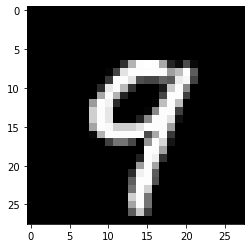

In [4]:
print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [5]:

first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


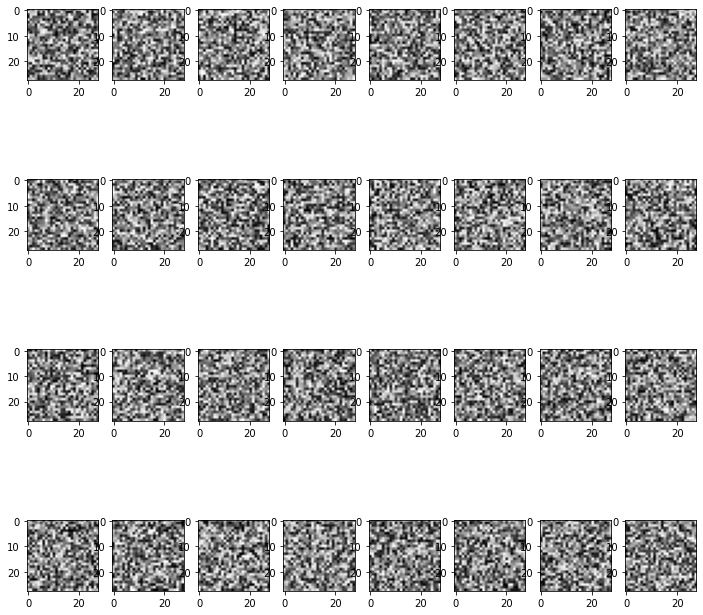

In [6]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [8]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 5s 4ms/step - loss: 1.9464 - accuracy: 0.4340
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.7514 - accuracy: 0.8055


### Testing

In [9]:

# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46135976910591125
Test accuracy: 0.8906000256538391


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


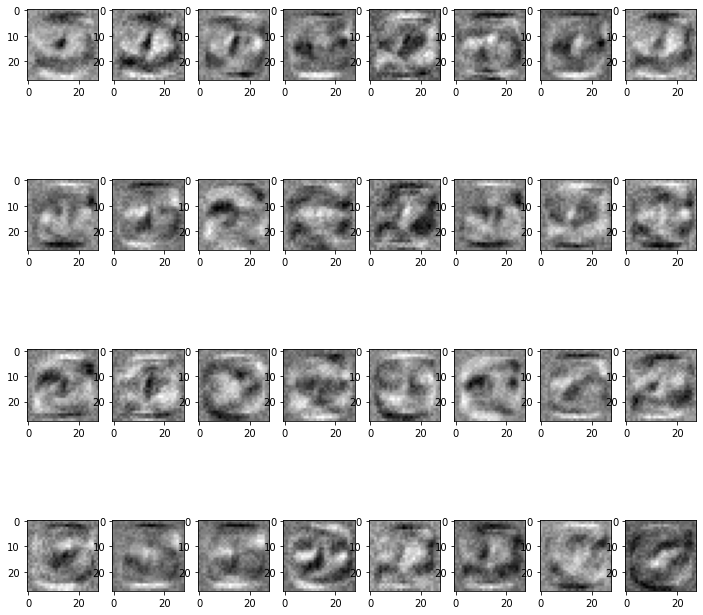

In [10]:

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [11]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [5.4606753e-03 1.0149422e-02 2.2008775e-02 1.1822479e-04 9.5331902e-03
 1.2150952e-03 9.4958979e-01 2.7356635e-05 1.6947240e-03 2.0260212e-04]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


### Ground truth

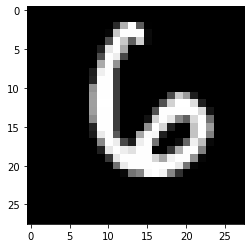

In [12]:
# Write the index of the test sample to show
plt.imshow(x_test[88:89].reshape(28,28),cmap='gray')
plt.show()

### User Input

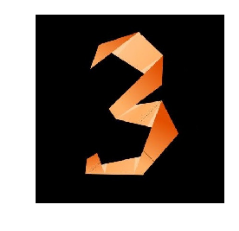

In [13]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/drive/MyDrive/csv/digit.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

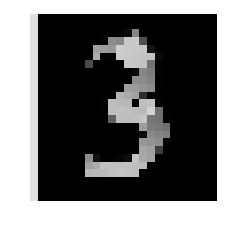

In [14]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/drive/MyDrive/csv/digit.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [15]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [8.1745535e-04 1.0869215e-04 1.7745681e-04 5.6368422e-02 8.7434432e-04
 3.5236362e-02 2.1747314e-06 8.4402388e-01 1.9816202e-03 6.0409524e-02]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit:
 7


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [16]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [17]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [18]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 3s 4ms/step - loss: 0.4178 - accuracy: 0.8941
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.3140 - accuracy: 0.9153
Test loss: 0.27098071575164795
Test accuracy: 0.9257000088691711


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [19]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.1637 - accuracy: 0.2925 - val_loss: 1.7758 - val_accuracy: 0.5205
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6467 - accuracy: 0.5697 - val_loss: 1.3061 - val_accuracy: 0.6509
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2139 - accuracy: 0.666

### Relu Activation Function

In [20]:
# Write your code here 

# Use the same model design from the above cell 
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.6263 - accuracy: 0.4466 - val_loss: 0.5303 - val_accuracy: 0.8507
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4830 - accuracy: 0.8632 - val_loss: 0.4079 - val_accuracy: 0.8777
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3914 - accuracy: 0.882

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 2.1296 - accuracy: 0.3431 - val_loss: 1.3832 - val_accuracy: 0.7485
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 1.1976 - accuracy: 0.7899 - val_loss: 0.7287 - val_accuracy: 0.8554
Test loss: 0.7287313938140869
Test accuracy: 0.855400025844574
Shape of First Layer (784, 8)
Visuali

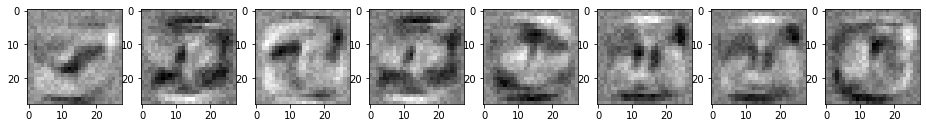

In [21]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 1.3785 - accuracy: 0.6494 - val_loss: 0.3605 - val_accuracy: 0.9075
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.9146 - val_loss: 0.2342 - val_accuracy: 0.9327
Test loss: 0.23421737551689148
Test accuracy: 0.932699978351593
Shape of First Layer (784, 128)


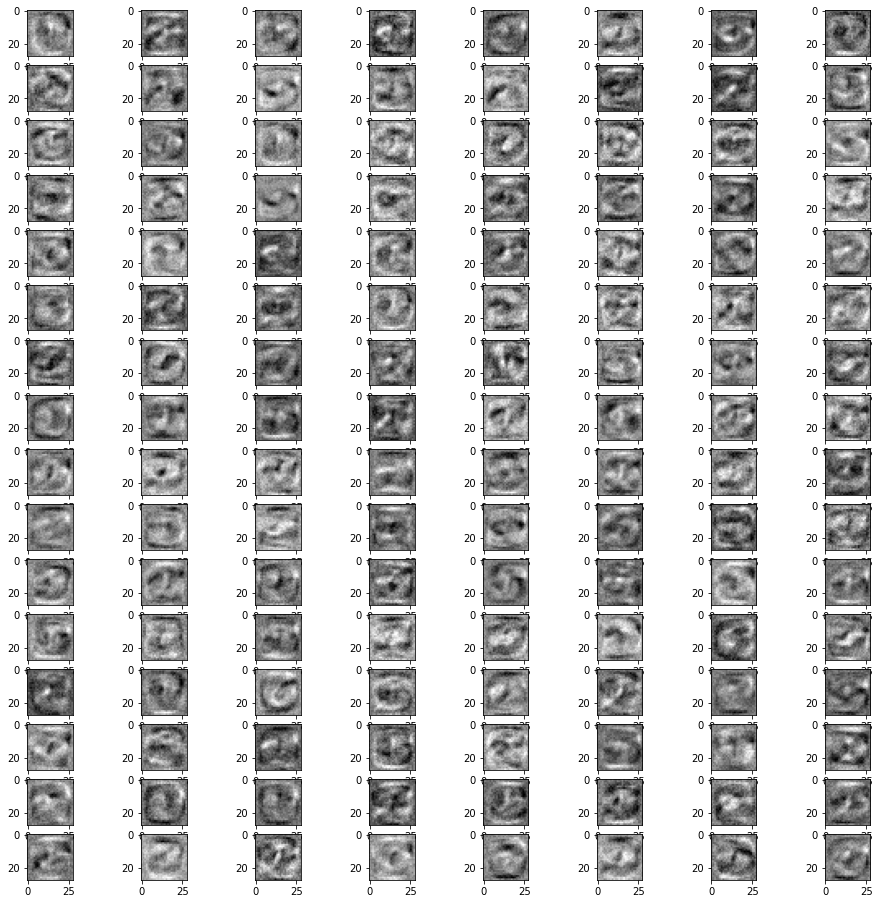

In [22]:
# Write your code here 

# Use the same layer design from the above cell 
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lower number of Layers. For example 1 hidden layer

In [23]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science